# Weather Data

Daily ocean temperature data since 1981. http://www.esrl.noaa.gov/psd/data/gridded/data.noaa.oisst.v2.html. This is roughly 52 GB - far more than fits in memory on my laptop.

In [1]:
import zarr
import dask.array as da

In [2]:
a = zarr.open_array("sst.day.mean.v2.zarr/", mode='r')
data = da.from_array(a, chunks=a.chunks)

In [3]:
data

dask.array<array-4..., shape=(12540, 720, 1440), dtype=float32, chunksize=(72, 360, 360)>

In [4]:
data.nbytes / 1e9

52.005888

# Plots!

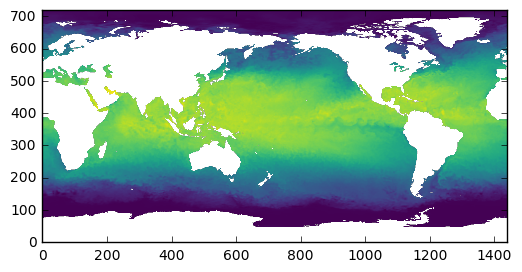

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(data[0], origin='lower', cmap='viridis')

# Computations

In [6]:
mean_over_time = da.nanmean(data, axis=(1, 2))

Note that this only builds up a graph of the computations, but doesn't actually run anything yet.

In [7]:
mean_over_time

dask.array<mean_ag..., shape=(12540,), dtype=float32, chunksize=(72,)>

To actually run the computation, we call the `compute` method. We'll wrap the call to `compute` with some diagnostics so we can inspect the performance later.

In [8]:
from dask.diagnostics import (ProgressBar, Profiler, ResourceProfiler,
                              visualize)

with ProgressBar(), Profiler() as prof, ResourceProfiler() as rprof:
    res = mean_over_time.compute()

[########################################] | 100% Completed | 44.1s


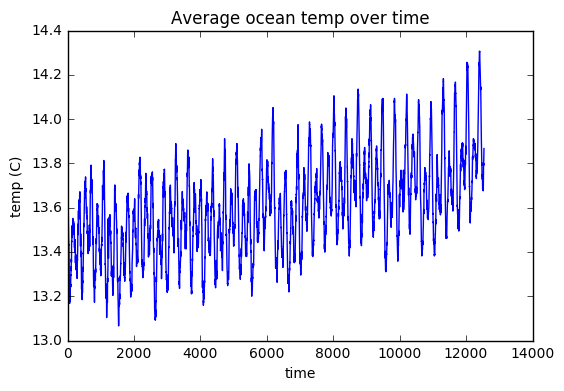

In [9]:
# Plot the result
plt.plot(res)
plt.title("Average ocean temp over time")
plt.xlabel('time')
plt.ylabel('temp (C)')

## Diagnostics

In [10]:
# NOTE: the output cell below is best viewed in nbviewer - github's viewer
# doesn't allow javascript.
from bokeh.io import output_notebook
output_notebook()
visualize([prof, rprof]);

Loading BokehJS ...

Column(id='3bf5bfdc-b613-417d-84b9-52f70fc8792a', ...)

From the above plot we can see that dask was able to fully utilize all 4 cores of my computer, and keep the memory usage well below the 52 GB that the full dataset contains.